In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

Scale label values

In [3]:
scale_factor = 1000
train_df['median_house_value'] /= scale_factor
test_df['median_house_value'] /= scale_factor

Functions to build and train model

In [4]:
def build_model(learning_rate):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model


def train_model(model, df, feature, label, epochs, batch_size=None, validation_split=0.1):
    history = model.fit(x=df[feature], y=df[label], batch_size=batch_size, epochs=epochs, validation_split=validation_split)

    weights = model.get_weights()[0]
    bias = model.get_weights()[1]
    epochs = history.epoch
    rmse = pd.DataFrame(history.history)['root_mean_squared_error'].to_list()

    return weights, bias, epochs, rmse, history.history

Plotting function

In [5]:
def plot_loss(epochs, mae_training, mae_validation):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    # don't plot first epoch because loss is too large
    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()

    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    y_max = highest_loss + (delta * 0.05)
    y_min = lowest_loss - (delta * 0.05)

    plt.ylim([y_min, y_max])
    plt.show()  

Epoch 1/30
136/136 [==============================] - 1s 6ms/step - loss: 37570.5000 - root_mean_squared_error: 193.8311 - val_loss: 45546.1680 - val_root_mean_squared_error: 213.4155
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 21354.8281 - root_mean_squared_error: 146.1329 - val_loss: 26322.7031 - val_root_mean_squared_error: 162.2427
Epoch 3/30
136/136 [==============================] - 0s 3ms/step - loss: 11301.8545 - root_mean_squared_error: 106.3102 - val_loss: 14250.4150 - val_root_mean_squared_error: 119.3751
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7004.2061 - root_mean_squared_error: 83.6911 - val_loss: 9390.9512 - val_root_mean_squared_error: 96.9069
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 6513.7402 - root_mean_squared_error: 80.7077 - val_loss: 9167.3428 - val_root_mean_squared_error: 95.7462
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 6512.9351 - ro

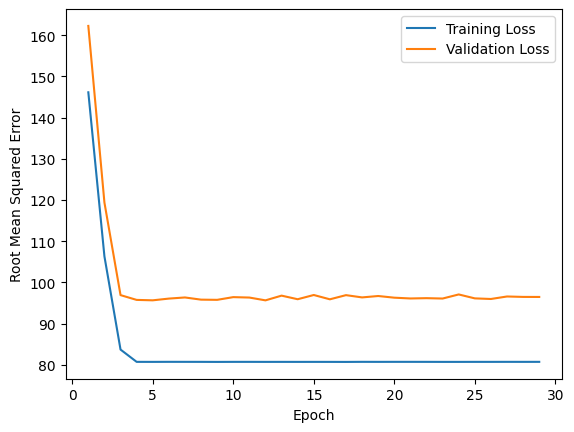

In [6]:
learning_rate = 0.08
epochs = 30
batch_size = 100
validation_split = 0.2
feature = 'median_income'
label = 'median_house_value'

model = build_model(learning_rate)
weights, bias, epochs, rmse, history = train_model(model, train_df, feature, label, epochs, batch_size, validation_split)

plot_loss(epochs, history['root_mean_squared_error'], history['val_root_mean_squared_error'])

Shuffle training set

In [6]:
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

Epoch 1/30
136/136 [==============================] - 1s 4ms/step - loss: 41482.4453 - root_mean_squared_error: 203.6724 - val_loss: 31119.7812 - val_root_mean_squared_error: 176.4080
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 23991.9473 - root_mean_squared_error: 154.8933 - val_loss: 17070.7461 - val_root_mean_squared_error: 130.6551
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 12855.1758 - root_mean_squared_error: 113.3807 - val_loss: 9164.3564 - val_root_mean_squared_error: 95.7306
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 7798.4912 - root_mean_squared_error: 88.3091 - val_loss: 6913.3066 - val_root_mean_squared_error: 83.1463
Epoch 5/30
136/136 [==============================] - 0s 3ms/step - loss: 7049.4443 - root_mean_squared_error: 83.9610 - val_loss: 6885.5981 - val_root_mean_squared_error: 82.9795
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 7047.0469 - root

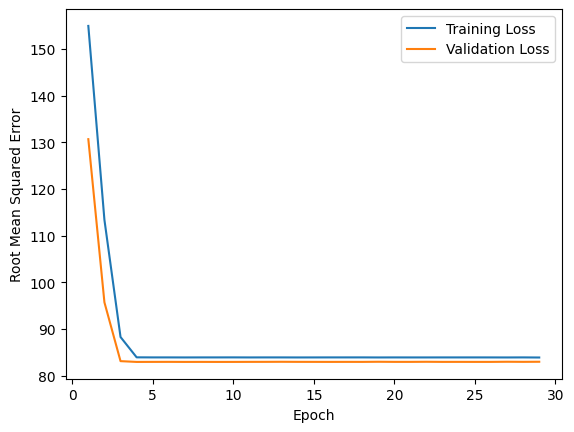

In [8]:
learning_rate = 0.08
epochs = 30
batch_size = 100
validation_split = 0.2
feature = 'median_income'
label = 'median_house_value'

model2 = build_model(learning_rate)
weights, bias, epochs, rmse, history = train_model(model2, shuffled_train_df, feature, label, epochs, batch_size, validation_split)

plot_loss(epochs, history['root_mean_squared_error'], history['val_root_mean_squared_error'])

In [9]:
x_test = test_df['median_income']
y_test = test_df['median_house_value']

model2.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 1ms/step - loss: 7009.6934 - root_mean_squared_error: 83.7239


[7009.693359375, 83.72391510009766]